<h3> <b>Import required libraries

In [2]:
from sklearn import svm
from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,recall_score,precision_score

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

<h3> <b> Load dataset

In [3]:
iris = load_iris()
type(iris)

sklearn.utils.Bunch

<h3><b> Understand dataset

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

<h3><b> Get feature names

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

<h3> <b> Add target column

In [6]:
df=pd.DataFrame(iris.data)
df.columns=iris.feature_names
df['target'] = iris['target']

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<h3> <b> Categorical variables

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

<h3><b> distribution of categorical column

In [8]:
df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

<h3> <b> Defining a function to 

    1. Fit

    2. Predict
    
    3. Calculate accuracy

    4. Visualize the model

In [9]:
def svm_reg(df):
    regr_model = svm.SVC(kernel='linear')
    
    x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,:-1].values,df.iloc[:,-1:].values,test_size=0.2,random_state=6)
    print('features',df.columns[:-1],'\n')
    print("Shape of DataFrame, X-Test,X-Train,Y-Test,Y-Train\t: ",df.shape,x_train.shape, x_test.shape,y_train.shape,y_test.shape)
    y_train=y_train.ravel()
    y_test=y_test.ravel()
    regr_model.fit(x_train, y_train)
    y_predict = regr_model.predict(x_test)
    
    print('accuracy:',accuracy_score(y_test,y_predict))
    print('Precision:',precision_score(y_test,y_predict,average='micro'))
    print('Recall:',recall_score(y_test,y_predict,average='micro'))
    
    cm=confusion_matrix(y_predict,y_test)
    report=classification_report(y_test, y_predict, digits=3)

    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1','Predicted 2']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1',2:'Actual 2'})
    print(cm_df)
    print(report)
    
    import matplotlib.pyplot as plt

    labels =['Class 0', 'Class 1', 'Class 2']
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix ')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.show()

features Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object') 

Shape of DataFrame, X-Test,X-Train,Y-Test,Y-Train	:  (150, 5) (120, 4) (30, 4) (120, 1) (30, 1)
accuracy: 1.0
Precision: 1.0
Recall: 1.0
          Predicted 0  Predicted 1  Predicted 2
Actual 0            9            0            0
Actual 1            0           10            0
Actual 2            0            0           11
              precision    recall  f1-score   support

           0      1.000     1.000     1.000         9
           1      1.000     1.000     1.000        10
           2      1.000     1.000     1.000        11

    accuracy                          1.000        30
   macro avg      1.000     1.000     1.000        30
weighted avg      1.000     1.000     1.000        30



<ipython-input-9-7b62f52477c6>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-9-7b62f52477c6>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


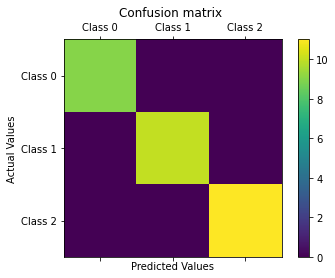

In [10]:
svm_reg(df)

<h1><b>Accuracy 100% reached

In [11]:
# Spot Check Algorithms
array = df.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

models = []
models.append(('Linear', svm.SVC(kernel='linear')))

In [20]:
# Spot Check Algorithms
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

array = df.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

models = []
models.append(('Linear', svm.SVC(kernel='linear')))
#models.append(('Gaussian', svm.SVC(kernel='gaussian')))
models.append(('Gaussian rbf', svm.SVC(kernel='rbf')))
models.append(('Sigmoid', svm.SVC(kernel='sigmoid')))
models.append(('polynomial', svm.SVC(kernel='poly')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

Linear: 0.975000 (0.038188)
Gaussian rbf: 0.966667 (0.040825)
Sigmoid: 0.366667 (0.040825)
polynomial: 0.975000 (0.038188)


Text(0.5, 1.0, 'Support Vector Classifier with linear kernel')

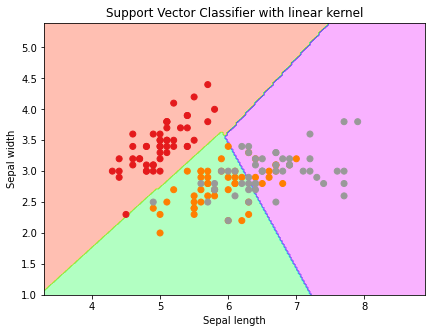

In [13]:
X = iris.data[:, :2]
y = iris.target
C = 1.0
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X_plot = np.c_[xx.ravel(), yy.ravel()]
svc_classifier = svm.SVC(kernel='linear', C=C).fit(X, y)

Z = svc_classifier.predict(X_plot)
Z = Z.reshape(xx.shape)

## Code of plotting
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.set_cmap("gist_rainbow") 
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Classifier with linear kernel')

Text(0.5, 1.0, 'Support Vector Classifier with linear kernel')

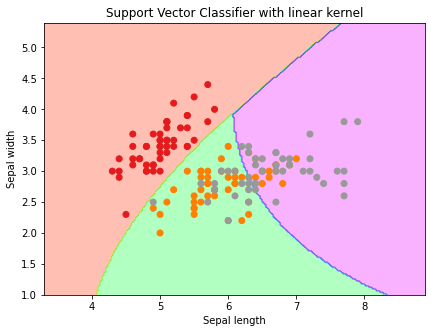

In [14]:
X = iris.data[:, :2]
y = iris.target
C = 1.0
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X_plot = np.c_[xx.ravel(), yy.ravel()]
svc_classifier = svm.SVC(kernel='poly', C=C).fit(X, y)

Z = svc_classifier.predict(X_plot)
Z = Z.reshape(xx.shape)

## Code of plotting
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.set_cmap("gist_rainbow") 
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Classifier with linear kernel')

features Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object') 

Shape of DataFrame, X-Test,X-Train,Y-Test,Y-Train	:  (150, 5) (120, 4) (30, 4) (120, 1) (30, 1)
accuracy: 1.0
Precision: 1.0
Recall: 1.0
          Predicted 0  Predicted 1  Predicted 2
Actual 0            9            0            0
Actual 1            0           10            0
Actual 2            0            0           11
              precision    recall  f1-score   support

           0      1.000     1.000     1.000         9
           1      1.000     1.000     1.000        10
           2      1.000     1.000     1.000        11

    accuracy                          1.000        30
   macro avg      1.000     1.000     1.000        30
weighted avg      1.000     1.000     1.000        30



<ipython-input-15-405a7a63bc16>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-15-405a7a63bc16>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


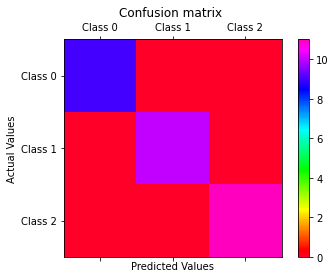

In [15]:
def svm_reg_1(df):
    regr_model = svm.SVC(kernel='poly')
    
    x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,:-1].values,df.iloc[:,-1:].values,test_size=0.2,random_state=6)
    print('features',df.columns[:-1],'\n')
    print("Shape of DataFrame, X-Test,X-Train,Y-Test,Y-Train\t: ",df.shape,x_train.shape, x_test.shape,y_train.shape,y_test.shape)
    y_train=y_train.ravel()
    y_test=y_test.ravel()
    regr_model.fit(x_train, y_train)
    y_predict = regr_model.predict(x_test)
    
    print('accuracy:',accuracy_score(y_test,y_predict))
    print('Precision:',precision_score(y_test,y_predict,average='micro'))
    print('Recall:',recall_score(y_test,y_predict,average='micro'))
    
    cm=confusion_matrix(y_predict,y_test)
    report=classification_report(y_test, y_predict, digits=3)

    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1','Predicted 2']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1',2:'Actual 2'})
    print(cm_df)
    print(report)
    
    import matplotlib.pyplot as plt

    labels =['Class 0', 'Class 1', 'Class 2']
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix ')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.show()
svm_reg_1(df)